In [2]:
#import libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

# Cross Validation

In [6]:
iris = load_iris()
X , y= iris.data , iris.target

In [8]:
kf= KFold(n_splits = 7, shuffle= True , random_state =42)

In [9]:
lr =LinearRegression()

In [11]:
scores = []
for train_index , test_index in kf.split(X):
    x_train , x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    lr.fit(x_train,y_train)
    y_pred= lr.predict(x_test)
    score=mean_squared_error(y_test,y_pred)
    scores.append(score)

In [12]:
mean_score= np.mean(scores)

In [13]:
print("K fold cross validation", scores)
print("Ortalama hata skoru", mean_score)

K fold cross validation [0.04693140674181533, 0.031019230810909557, 0.04404558849549159, 0.04299415686371646, 0.08340107515231929, 0.04739576596000059, 0.057004593730740835]
Ortalama hata skoru 0.05039883110785624


# Confusion Matrix

In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# İris Dataset

In [15]:
iris=load_iris()
X_train , X_test , y_train , y_test =train_test_split(iris.data, iris.target,test_size=0.3,random_state=42)

In [16]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

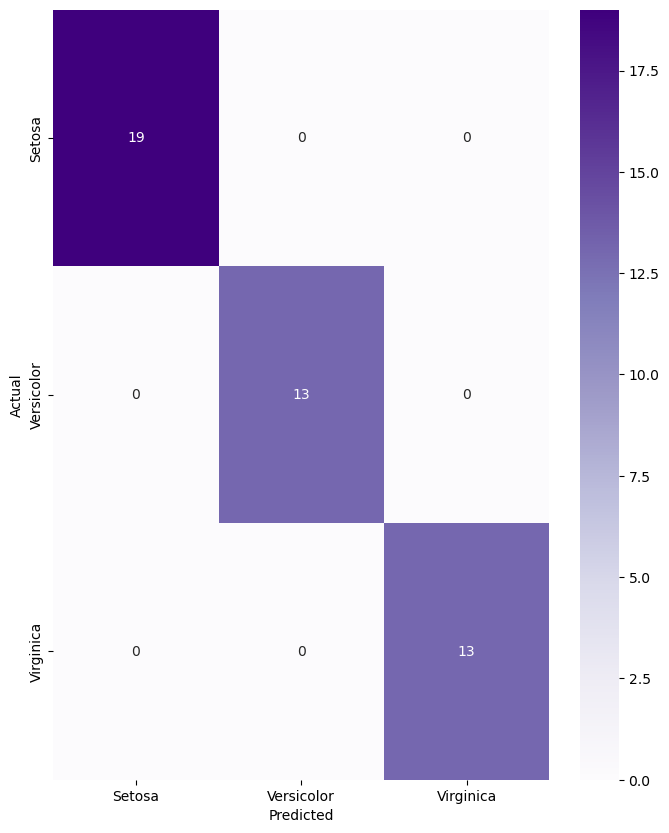

In [17]:
y_pred= model.predict(X_test)
cm= confusion_matrix(y_test , y_pred)
labels=["Setosa","Versicolor","Virginica"]
df_cm= pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8,10))
sns.heatmap(df_cm, annot=True,cmap=plt.cm.Purples)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Biomechanical Features of Orthopedic Patients Dataset

In [18]:
bio_dataset = pd.read_csv("C:/Users/ebruo/OneDrive/Resimler/Masaüstü/MachineLearning/column_2C_weka.csv")

In [19]:
bio_dataset.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


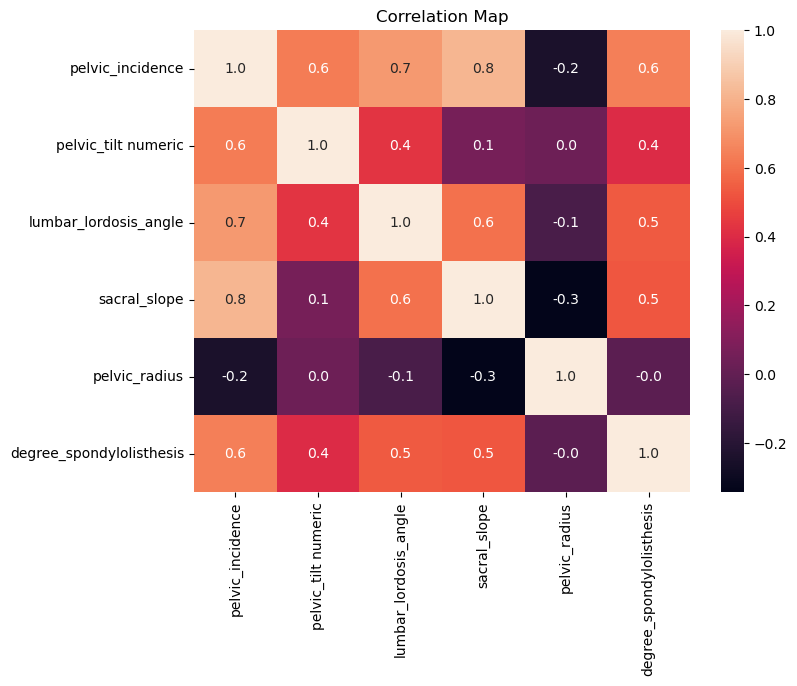

In [20]:
f,ax=plt.subplots(figsize = (8,6))
sns.heatmap(bio_dataset.corr(),annot= True,linewidths=0.,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

# Diabetes Dataset

In [21]:
diabetes_dataset = pd.read_csv("C:/Users/ebruo/OneDrive/Resimler/Masaüstü/MachineLearning/diabetes.csv")

In [22]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


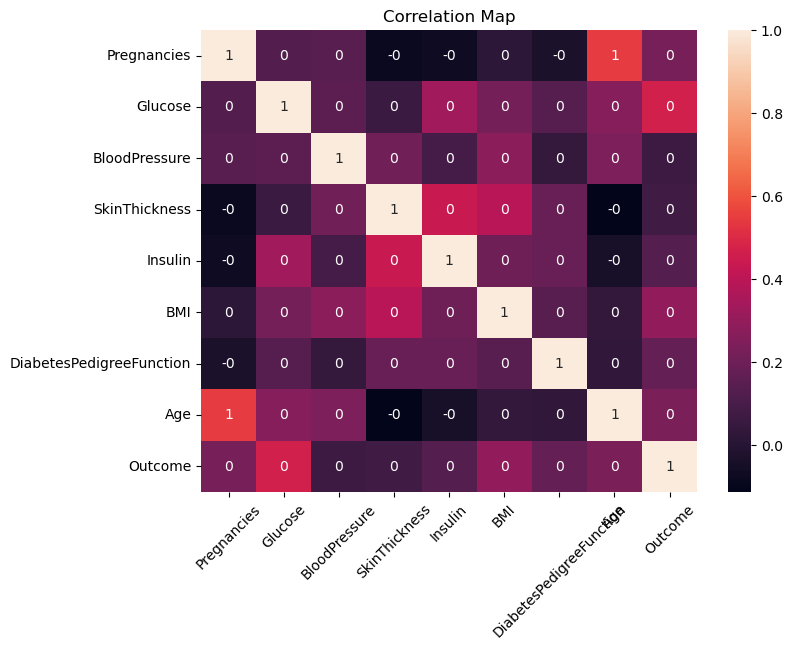

In [24]:
f,ax=plt.subplots(figsize = (8,6))
sns.heatmap(diabetes_dataset.corr(),annot= True,linewidths=0.,fmt = ".0f",ax=ax)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

# Creating Our Own Data

In [26]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [28]:
X, y = make_classification(n_samples=3000, n_classes=2, random_state=42)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = lr.predict(X_test)

In [32]:
#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

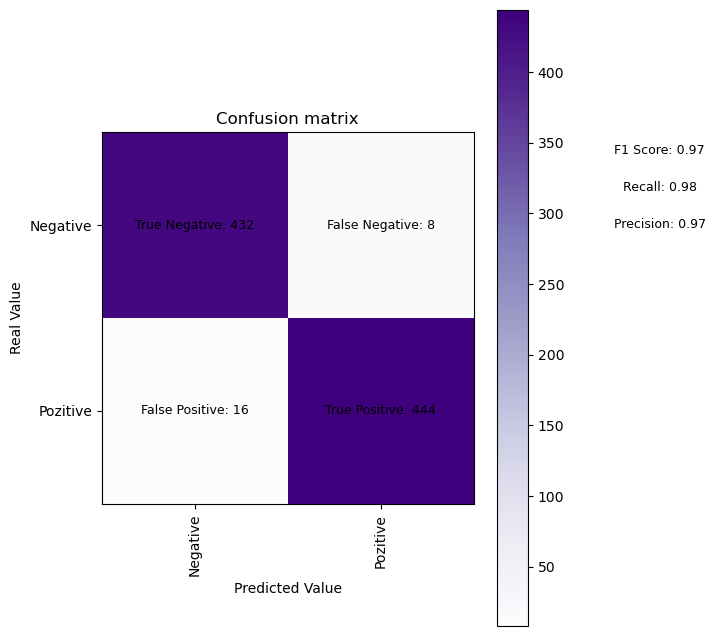

In [35]:
plt.figure(figsize=(6,8))
plt.imshow(cm, cmap='Purples', interpolation='nearest')
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Negative", "Pozitive"], rotation=90)
plt.yticks(tick_marks, ["Negative", "Pozitive"])
plt.xlabel("Predicted Value")
plt.ylabel("Real Value")
plt.text(0, 0, f"True Negative: {tn}", ha="center", va="center", color="black", fontsize=9)
plt.text(0, 1, f"False Positive: {fp}", ha="center", va="center", color="black", fontsize=9)
plt.text(1, 0, f"False Negative: {fn}", ha="center", va="center", color="black", fontsize=9)
plt.text(1, 1, f"True Positive: {tp}", ha="center", va="center", color="black", fontsize=9)
plt.text(2.5, 0, f"Precision: {precision:.2f}", ha="center", va="center", color="black", fontsize=9)
plt.text(2.5, -0.2, f"Recall: {recall:.2f}", ha="center", va="center", color="black", fontsize=9)
plt.text(2.5, -0.4, f"F1 Score: {f1_score:.2f}", ha="center", va="center", color="black", fontsize=9)
plt.show()
